Group 5: 
David C Belmonte,
Elena Sejin Chun,
Frances Caroline Lowder,
Reliza McGinnis,
Jackson Rapala


Project option 1 - Drug annotation of 23andme report

Discussion Question Responses

Reliza McGinnis

Question 1: What was your biggest challenge in this project?
The biggest challenge with this assignment was dealing with the database manipulation to ensure the format was what was desired. Often the functions with default parameters would provide outputs that were 'ugly' (ex. plotting). 

Question 2: What did you learn while working on this project?
I learned that sometimes its better to just leave questionable code formatting or weird programming "quick fixes" (ex. like manipulating the bin range for histograms) instead of trying to figure out more elegant code or figuring out the weird plotting rule causing issues.

Question 3: If you had more time on the project what other question(s) would you like to answer?
If I had more time to work on the project, I would have dove deeper into the drugs that had alleles matching the patient. Once we narrowed down the ~30 drugs the patient had matching alleles for, it would've been insightful to explore each drug or additional patient info to see if some were more detrimental to the patient's health than others.

Jackson Rapala

Question 1: What was your biggest challenge in this project?
The biggest challenge with this project's code itself was how to properly merge the two datasets based on the SNP ID. I struggled to do this with python alone, so instead I created the tables with SQLite and merged them through SQL and then converted the joined tables into a DataFrame that I could then save. A minor challenge I also had was using a GitHub repository for the first time with other people rather than just test repos. While not difficult to manage, I needed to be more careful so I wouldn't accidentally erase anyone's files.

Question 2: What did you learn while working on this project?
This project helped reinforce my understanding and practice of data management through SQL and Pandas. It also helped me practice my coding abilities in Python. Additionally, the data itself was really interesting, and I didn't fully appreaciate the impact that genetic variation plays on drug efficacy. This sort of information is really interesting from a biological perspective, since a mechanistic understanding of how these biological variants affect drug efficacy are not well understood and a great way to build new/interesting hypotheses.

Question 3: If you had more time on the project what other question(s) would you like to answer?
I would like to know what genes are associated with the SNPs? And can the variant explain the altered drug interaction (nonsense mutation vs silent mutation, etc.)? I'm also curious to know how frequent some of these drug-associated SNPs are in the human population and are there certain sub-populations where these variants are more common? All of these questions, however, are much broader than the original scope of the datasets and would require additional sources of information.

David Belmonte

Question 1: What was your biggest challenge in this project?
The biggest challenge for me was trying to make sense of the data (i.e., what it meant when the patient had a SNP matching that found in the drug table).  It required you to look more granularly to interpret the data.  This concern was relevant to the last task our group had to do, and coming to a consensus.

Question 2: What did you learn while working on this project?
I learned that everyone has different strengths (e.g., computing and biomedical knowledge) and how we worked together to  to accomplish our task. 

Question 3: If you had more time on the project what other question(s) would you like to answer?
My interest is in Psychiatry, and I recognized some of the medications in the table are ones I prescribe.  If I had more time, I  would spend more time exploring the efficacy data for individual drugs associated with the polymorphisms. 

Elena Sejin Chun

Question 1: What was your biggest challenge in this project?
The biggest challenge for me while writing code was realizing that the gene and drug columns do not have unique entries by row, splitting the entries to be unique, and properly summarizing the data. Another small challenge was that I ran into technical issues with my github since it was one of my first times using it to collaborate with others.

Question 2: What did you learn while working on this project?
I learned a lot about the 23andme data itself and I thought it was very interesting. I am in the Biostatistics program and we usually do not work with data that is so dense with biological information. I was thankful to further learn about data manipulation with python through this project.

Question 3: If you had more time on the project what other question(s) would you like to answer?
I would like to further explore the genetic variants that affect drug toxicity. The clinical trials course I am currently taking emphasizes limiting drug toxicities and finding maximum tolerated doses in earlier trials. I think this genetic variant data can add valuable information in finding doses.

Frances Caroline Lowder

Question 1: What was your biggest challenge in this project?
My biggest challenge when working on this project was not getting overwhelmed with all of the data available. In particular, I had difficulty trying to determine a specific enough question to ask that was within the scope of the assignment for the last question. Having a group to bounce ideas off was helpful here, especially with the wide variety of backgrounds present in the group. 

Question 2: What did you learn while working on this project?
While working on this project, I learned more about data parsing and how to logically plan my filtering steps to avoid unintentional loss of data. It was also interesting to think about how I would have done this project using R and which elements would have been easier/harder.

Question 3: If you had more time on the project what other question(s) would you like to answer?
With more time, I would have liked to dive further into the patient data and the implications that their genetic makeup has for drug interactions. I would have liked to find out which drugs they have positive associations or negative associations with, then determined if there are general drug categories or diseases they should be concerned about. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#read in data
dat = pd.read_table('23andme_v5_hg19_ref.txt', names=['CHR','POS','dbSNP_ID','ALLELE_23andme'])
ann = pd.read_csv('var_drug_ann.tsv', sep = '\t')

In [3]:
#1. Map/merge the 23andme file and the variant-drug annotation file based on dbSNP_ID (also known as rsID).
ann = ann.rename(columns = {'Variant/Haplotypes':'dbSNP_ID',
                           'Gene':'GENE_SYMBOL',
                           'Drug(s)':'DRUG_NAME',
                           'Phenotype Category':'PHENOTYPE_CATEGORY',
                           'Significance':'SIGNIFICANCE',
                           'Notes':'NOTES',
                           'Sentence':'SENTENCE',
                           'Alleles':'ALLELE_PharmGKB'})

data = dat[['dbSNP_ID','ALLELE_23andme']].merge(ann[['dbSNP_ID','GENE_SYMBOL', 'DRUG_NAME',
       'PMID', 'PHENOTYPE_CATEGORY', 'SIGNIFICANCE', 'NOTES', 'SENTENCE',
       'ALLELE_PharmGKB']], how = 'inner', on = 'dbSNP_ID')

data

,dbSNP_ID,ALLELE_23andme,GENE_SYMBOL,DRUG_NAME,PMID,PHENOTYPE_CATEGORY,SIGNIFICANCE,NOTES,SENTENCE,ALLELE_PharmGKB
0,rs11807862,T,PRDM16,"atorvastatin, hmg coa reductase inhibitors, si...",24096969,Efficacy,no,There could be strand confusion with this A/T ...,Genotype AA is associated with decreased respo...,AA
1,rs228729,T,PER3,lithium,21781277,Efficacy,no,NaN,Allele T is not associated with increased resp...,T
2,rs228642,C,PER3,lithium,21781277,Efficacy,no,NaN,Allele C is not associated with increased resp...,C
3,rs228666,T,PER3,lithium,21781277,Efficacy,no,NaN,Allele C is not associated with increased resp...,C
4,rs228697,C,PER3,lithium,21781277,Efficacy,no,NaN,Allele G is not associated with increased resp...,G
...,...,...,...,...,...,...,...,...,...,...
5650,rs3810651,T,GABRQ,botulinum toxin type a,31014225,Efficacy,no,No significant difference in allele frequency ...,Allele T is not associated with response to bo...,T
5651,rs17435,T,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A
5652,rs1734787,A,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A
5653,rs1734791,A,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A


In [4]:
#2. Filter the output so that it only contains significant associations (SIGNIFICANCE is yes) for variants that affect the drug efficacy (`PHENOTYPE_CATEGORY` is `efficacy`).
data = data[(data.SIGNIFICANCE == 'yes') & (data.PHENOTYPE_CATEGORY == 'Efficacy')]
data = data.reset_index(drop=True)
data

,dbSNP_ID,ALLELE_23andme,GENE_SYMBOL,DRUG_NAME,PMID,PHENOTYPE_CATEGORY,SIGNIFICANCE,NOTES,SENTENCE,ALLELE_PharmGKB
0,rs1801131,T,MTHFR,oxaliplatin,20385995,Efficacy,yes,Statistics given as trend for increased overal...,Genotypes GG + GT are associated with increase...,GG + GT
1,rs1801131,T,MTHFR,"Vitamin B-complex, Incl. Combinations",27035272,Efficacy,yes,Please note that allele has been complemented ...,Allele G is associated with increased response...,G
2,rs1801131,T,MTHFR,methotrexate,25618758,Efficacy,yes,Alleles given as C and A. Efficacy of treatmen...,Genotype GT is associated with decreased respo...,GT
3,rs1801131,T,MTHFR,methotrexate,23198157,Efficacy,yes,Patients with the GG genotype had better overa...,Genotype GG is associated with increased respo...,GG
4,rs1801131,T,MTHFR,methotrexate,24386571,Efficacy,yes,Patients with the TT genotype had significantl...,Genotype TT is associated with decreased respo...,TT
...,...,...,...,...,...,...,...,...,...,...
1298,rs502434,T,GRIA3,"Selective serotonin reuptake inhibitors, venla...",23394390,Efficacy,yes,Regression model looking at interaction betwee...,Genotype CC is associated with decreased respo...,CC
1299,rs3810651,T,GABRQ,venlafaxine,23394390,Efficacy,yes,Those with the AA/AT genotype are more likely ...,Genotypes AA + AT are associated with increase...,AA + AT
1300,rs17435,T,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A
1301,rs1734787,A,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A


In [5]:
#3. Save the output of the filtering step in a tab-separated file (23andme_PharmGKB_map.tsv) with the following columns:
#dbSNP_ID, GENE_SYMBOL, DRUG_NAME, NOTES, SENTENCE, ALLELE_PharmGKB, ALLELE_23andme

data.to_csv('23andme_PharmGKB_map.tsv',sep='\t', columns = ['dbSNP_ID', 'GENE_SYMBOL', 'DRUG_NAME', 'NOTES', 'SENTENCE', 'ALLELE_PharmGKB', 'ALLELE_23andme'])

In [6]:
#4. Create a tab separated file (23andme_PharmGKB_summary.tsv) with summarized data with the following columns:
#GENE_SYMBOL, DRUG_NAME, dbSNP_IDs (list of IDs separated by ";")

#There are rows with multiple drug names and multiple gene symbols so we split those and get list of unique ids with respective gene&drug
data1= pd.DataFrame({'dbSNP_ID': data.dbSNP_ID,
                     'GENE_SYMBOL':data.GENE_SYMBOL,
                     'idx': data.index})

data_drug_split = pd.DataFrame({'DRUG_NAME': [],
                                'idx': []})
data_drug_split.DRUG_NAME = data.DRUG_NAME.str.split(', ').explode()
data_drug_split.idx = data_drug_split.index
data_drug_split = data_drug_split.merge(data1, how='left', on='idx')
data_drug_split.idx = data_drug_split.index

data_gene_split = pd.DataFrame({'GENE_SYMBOL': [],
                                'idx': []})
data_gene_split.GENE_SYMBOL = data_drug_split.GENE_SYMBOL.str.split(', ').explode()
data_gene_split.idx = data_gene_split.index

data_drug_split = data_drug_split.drop(columns = ['GENE_SYMBOL'])
data_gene_split = data_gene_split.merge(data_drug_split, how='left', on='idx')
data_gene_split = data_gene_split.drop(columns = ['idx'])

data_gene_split

,GENE_SYMBOL,DRUG_NAME,dbSNP_ID
0,MTHFR,oxaliplatin,rs1801131
1,MTHFR,Vitamin B-complex,rs1801131
2,MTHFR,Incl. Combinations,rs1801131
3,MTHFR,methotrexate,rs1801131
4,MTHFR,methotrexate,rs1801131
...,...,...,...
2107,MECP2,fluorouracil,rs1734787
2108,MECP2,mitoxantrone,rs1734787
2109,MECP2,cisplatin,rs1734791
2110,MECP2,fluorouracil,rs1734791


In [7]:
data_gene_split.groupby(['GENE_SYMBOL','DRUG_NAME']).value_counts()

GENE_SYMBOL  DRUG_NAME               dbSNP_ID  
ABCA1        atorvastatin            rs2230806     1
             fenofibrate             rs2230806     2
                                     rs2230808     1
             rosuvastatin            rs2230806     1
             simvastatin             rs2230806     1
                                                  ..
ZNF432       fluticasone propionate  rs3752120     1
             fluticasone/salmeterol  rs3752120     1
ZNF697       interferon beta-1a      rs10494227    1
             interferon beta-1b      rs10494227    1
ZNF804A      antipsychotics          rs1344706     1
Length: 1400, dtype: int64

In [8]:
data_summ = data_gene_split.groupby(['GENE_SYMBOL','DRUG_NAME'])['dbSNP_ID'].agg(lambda x: ';'.join(x)).reset_index()
data_summ = data_summ.rename(columns = {'dbSNP_ID':'dbSNP_IDs'})
data_summ
#strip

,GENE_SYMBOL,DRUG_NAME,dbSNP_IDs
0,ABCA1,atorvastatin,rs2230806
1,ABCA1,fenofibrate,rs2230808;rs2230806;rs2230806
2,ABCA1,rosuvastatin,rs2230806
3,ABCA1,simvastatin,rs2230806
4,ABCB1,antipsychotics,rs1128503
...,...,...,...
1063,ZNF432,fluticasone propionate,rs3752120
1064,ZNF432,fluticasone/salmeterol,rs3752120
1065,ZNF697,interferon beta-1a,rs10494227
1066,ZNF697,interferon beta-1b,rs10494227


In [9]:
d = data_summ['dbSNP_IDs'].str.contains(';')
sum(d)

314

In [10]:
data_summ.to_csv('23andme_PharmGKB_summary.tsv',sep='\t')

### Part 5 - Reliza McGinnis

In [11]:
# load summarized data
summarized_data = pd.read_csv('23andme_PharmGKB_summary.tsv',sep='\t')

# Count the occurrences of each GENE_SYMBOL
drug_counts = summarized_data['GENE_SYMBOL'].value_counts()

# find range of values 
drug_bin_max = drug_counts.max()
drug_bin_min = drug_counts.min()
# set bin width to be single integer
bin_width = 1


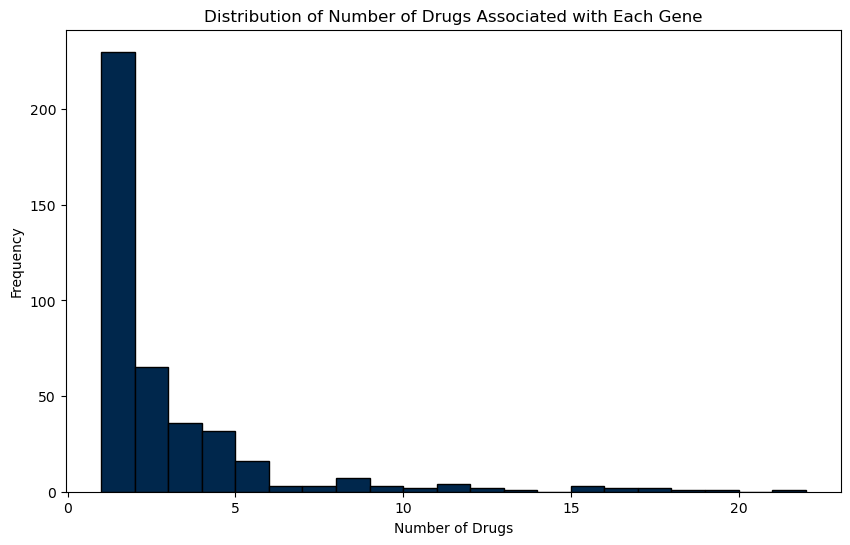

In [12]:

# Plotting the histogram for Distribution of # of drugs with each gene
plt.figure(figsize=(10, 6))
plt.hist(drug_counts, bins = range(drug_bin_min, drug_bin_max+2, bin_width),color='#00274C', edgecolor='black')
plt.title('Distribution of Number of Drugs Associated with Each Gene')
plt.xlabel('Number of Drugs')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Counting the number of SNPs for each gene
# Splitting and exploding the dbSNP_IDs column
summarized_data['dbSNP_IDs'] = summarized_data['dbSNP_IDs'].apply(lambda x: str(x).split(';'))

# Convenient way of breaking apart column indexes with multiple values contained into new rows
data_exploded = summarized_data.explode('dbSNP_IDs')

# Count unique SNPs for each gene
unique_snp_counts = data_exploded.groupby('GENE_SYMBOL')['dbSNP_IDs'].nunique()

bin_max = unique_snp_counts.max()
bin_min = unique_snp_counts.min()
bin_width = 1


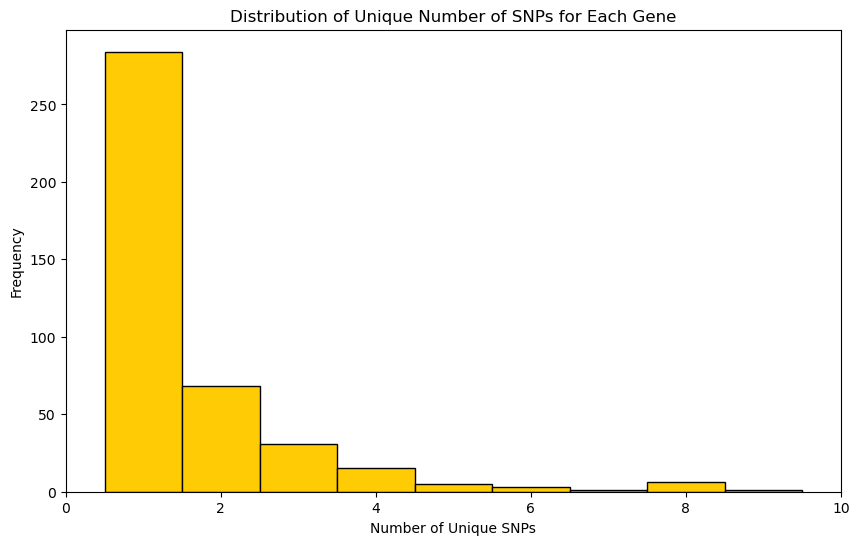

In [15]:

# Plotting the histogram for SNP counts
plt.figure(figsize=(10, 6))
plt.hist(unique_snp_counts,bins = range(bin_min, bin_max+2, bin_width),color='#FFCB05', edgecolor='black', align = 'left')
plt.xlim(0,bin_max+1)
plt.title('Distribution of Unique Number of SNPs for Each Gene')
plt.xlabel('Number of Unique SNPs')
plt.ylabel('Frequency')
plt.show()


## Question 6:  As a team decide on a new feature to implement that can answer a relevant biological question using these data and implement the feature

We thought it would be important to determine which drugs may be abnormally metabolized by the patient based on their SNP profile.  We set out to see which of their SNPs matched to known polymorphism with altered metabolism.  We 

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
#read in data
dat = pd.read_table('23andme_v5_hg19_ref.txt', names=['CHR','POS','dbSNP_ID','ALLELE_23andme'])
ann = pd.read_csv('var_drug_ann.tsv', sep = '\t')

In [ ]:
#Map/merge the 23andme file and the variant-drug annotation file based on dbSNP_ID (also known as rsID).
ann = ann.rename(columns = {'Variant/Haplotypes':'dbSNP_ID',
                           'Gene':'GENE_SYMBOL',
                           'Drug(s)':'DRUG_NAME',
                           'Phenotype Category':'PHENOTYPE_CATEGORY',
                           'Significance':'SIGNIFICANCE',
                           'Notes':'NOTES',
                           'Sentence':'SENTENCE',
                           'Alleles':'ALLELE_PharmGKB'})

data = dat[['dbSNP_ID','ALLELE_23andme']].merge(ann[['dbSNP_ID','GENE_SYMBOL', 'DRUG_NAME',
       'PMID', 'PHENOTYPE_CATEGORY', 'SIGNIFICANCE', 'NOTES', 'SENTENCE',
       'ALLELE_PharmGKB']], how = 'inner', on = 'dbSNP_ID')

#data

In [ ]:
#6  Filter the output so that it only contains significant associations (SIGNIFICANCE is yes) for variants that affect the drug metabolism (`PHENOTYPE_CATEGORY` is `Metabolism/PK`).
data = data[(data.SIGNIFICANCE == 'yes') & (data.ALLELE_23andme == data.ALLELE_PharmGKB) & (data.PHENOTYPE_CATEGORY == 'Metabolism/PK')]
data = data.reset_index(drop=True)
data

In [ ]:
data.to_csv('Question6.tsv',sep='\t', columns = ['dbSNP_ID', 'GENE_SYMBOL', 'DRUG_NAME', 'NOTES', 'SENTENCE', 'ALLELE_PharmGKB', 'ALLELE_23andme'])

Based on this information, the patient should be informed that the metabolism of the certain drugs may be altered and the dosage may have to be adjusted if taken:
tacrolimus, midazolam, methotrexate, lumefantrine, warfarin, ticagrelor, efavirenz, cyclosporin, cotinine, apixaban, docetaxel, fentanyl, lopinavir, fentanyl, nicotine, olanzapine. 